In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import scipy
import pandas as pd
print(tf.__version__)

2.13.0


In [ ]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
mnist = keras.datasets.mnist
(train_images_mnist,train_labels_mnist),(test_images_mnist,test_labels_mnist) = mnist.load_data()
# images are reshaped to be used by the flow method of a keras ImageGenerator
train_images_mnist = np.reshape(train_images_mnist,(train_images_mnist.shape[0],28,28,1))
test_images_mnist = np.reshape(test_images_mnist,(test_images_mnist.shape[0],28,28,1))

In [ ]:
az_data_path = '/home/data2innov/Téléchargements/archive(1)'
AZ_data = pd.read_csv(az_data_path +'/A_Z Handwritten Data.csv',header = None)
# the first column contains label values, while the remaining are the flattened array of 28 x 28 image pixels
AZ_labels = AZ_data.values[:,0]
AZ_images = AZ_data.values[:,1:]
# images are reshaped to be used by the flow method of a keras ImageGenerator
AZ_images = np.reshape(AZ_images,(AZ_images.shape[0],28,28,1))

In [ ]:
# join datasets
# split AZ data in train and test
from sklearn.model_selection import train_test_split

test_size = float(len(test_labels_mnist))/len(train_labels_mnist)
print(f'test set size: {test_size}')
train_images_AZ, test_images_AZ, train_labels_AZ, test_labels_AZ = train_test_split(AZ_images,AZ_labels, test_size=test_size)
#shift mnist labels
train_labels_mnist = train_labels_mnist + max(AZ_labels)+1
test_labels_mnist = test_labels_mnist + max(AZ_labels)+1

# concatenate datasets
train_images = np.concatenate((train_images_AZ,train_images_mnist),axis=0)
train_labels = np.concatenate((train_labels_AZ,train_labels_mnist))
test_images = np.concatenate((test_images_AZ,test_images_mnist),axis=0)
test_labels = np.concatenate((test_labels_AZ,test_labels_mnist))

print('Data ready')

test set size: 0.16666666666666666
Data ready


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow training images in batches using generator
train_generator = train_datagen.flow(train_images, train_labels, batch_size=50, shuffle=True)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=50, shuffle=True)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=500,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)
model.save('model_v2')

Epoch 1/100
500/500 - 5s - loss: 2.4299 - accuracy: 0.3565 - val_loss: 1.2259 - val_accuracy: 0.6640 - 5s/epoch - 11ms/step
Epoch 2/100
500/500 - 5s - loss: 1.6192 - accuracy: 0.5588 - val_loss: 0.7455 - val_accuracy: 0.7952 - 5s/epoch - 10ms/step
Epoch 3/100
500/500 - 5s - loss: 1.2278 - accuracy: 0.6606 - val_loss: 0.5212 - val_accuracy: 0.8628 - 5s/epoch - 10ms/step
Epoch 4/100
500/500 - 5s - loss: 0.9847 - accuracy: 0.7269 - val_loss: 0.4615 - val_accuracy: 0.8748 - 5s/epoch - 10ms/step
Epoch 5/100
500/500 - 5s - loss: 0.8263 - accuracy: 0.7652 - val_loss: 0.3707 - val_accuracy: 0.8960 - 5s/epoch - 9ms/step
Epoch 6/100
500/500 - 5s - loss: 0.7411 - accuracy: 0.7897 - val_loss: 0.3601 - val_accuracy: 0.8992 - 5s/epoch - 9ms/step
Epoch 7/100
500/500 - 5s - loss: 0.6671 - accuracy: 0.8115 - val_loss: 0.3431 - val_accuracy: 0.9060 - 5s/epoch - 9ms/step
Epoch 8/100
500/500 - 5s - loss: 0.6116 - accuracy: 0.8264 - val_loss: 0.2866 - val_accuracy: 0.9216 - 5s/epoch - 9ms/step
Epoch 9/100


INFO:tensorflow:Assets written to: model_v2/assets


In [ ]:
import imutils


In [ ]:
#Recognize handwriting example
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import imutils
from imutils.contours import sort_contours

In [ ]:
# loads the model with the keras load_model function
model_path = 'model_v2'
print("Loading NN model...")
model = load_model(model_path)
print("Done")

Loading NN model...
Done


In [ ]:
# loads the input image
image_path = '/home/data2innov/ocr-project/ordonnancedupagne.jpg'
image = cv2.imread(image_path)
#from google.colab import files
#image = files.upload()

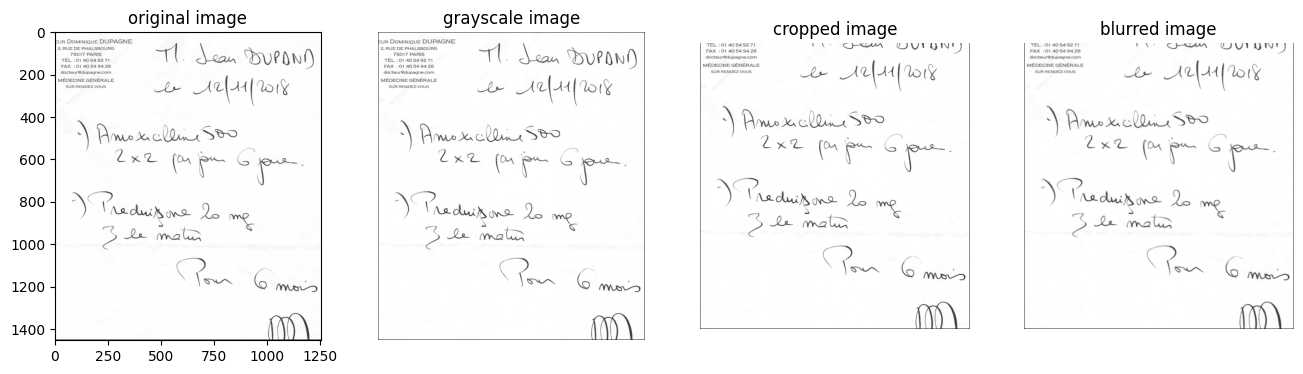

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = gray[120:,:]
blurred = cv2.GaussianBlur(cropped, (5, 5), 0)


%matplotlib inline
from matplotlib import cm
fig = plt.figure(figsize=(16,4))
ax = plt.subplot(1,4,1)
ax.imshow(image)
ax.set_title('original image');

ax = plt.subplot(1,4,2)
ax.imshow(gray,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('grayscale image');

ax = plt.subplot(1,4,3)
ax.imshow(cropped,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('cropped image');

ax = plt.subplot(1,4,4)
ax.imshow(blurred,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('blurred image');
#plt.imshow(gray,cmap=cm.binary_r)

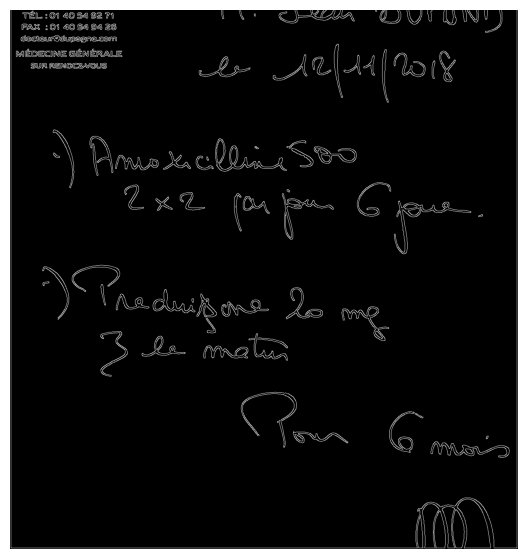

In [ ]:
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 250) #low_threshold, high_threshold
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

figure = plt.figure(figsize=(7,7))
plt.axis('off');
plt.imshow(edged,cmap=cm.binary_r);

In [ ]:
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and isolate ROI
  (x, y, w, h) = cv2.boundingRect(c)
  roi = cropped[y:y + h, x:x + w]

  #binarize image, finds threshold with OTSU method
  thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  # resize largest dimension to input size
  (tH, tW) = thresh.shape
  if tW > tH:
    thresh = imutils.resize(thresh, width=28)
  # otherwise, resize along the height
  else:
    thresh = imutils.resize(thresh, height=28)

  # find how much is needed to pad
  (tH, tW) = thresh.shape
  dX = int(max(0, 28 - tW) / 2.0)
  dY = int(max(0, 28 - tH) / 2.0)
  # pad the image and force 28 x 28 dimensions
  padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
    left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
    value=(0, 0, 0))
  padded = cv2.resize(padded, (28, 28))
  # reshape and rescale padded image for the model
  padded = padded.astype("float32") / 255.0
  padded = np.expand_dims(padded, axis=-1)
  # append image and bounding box data in char list
  chars.append((padded, (x, y, w, h)))

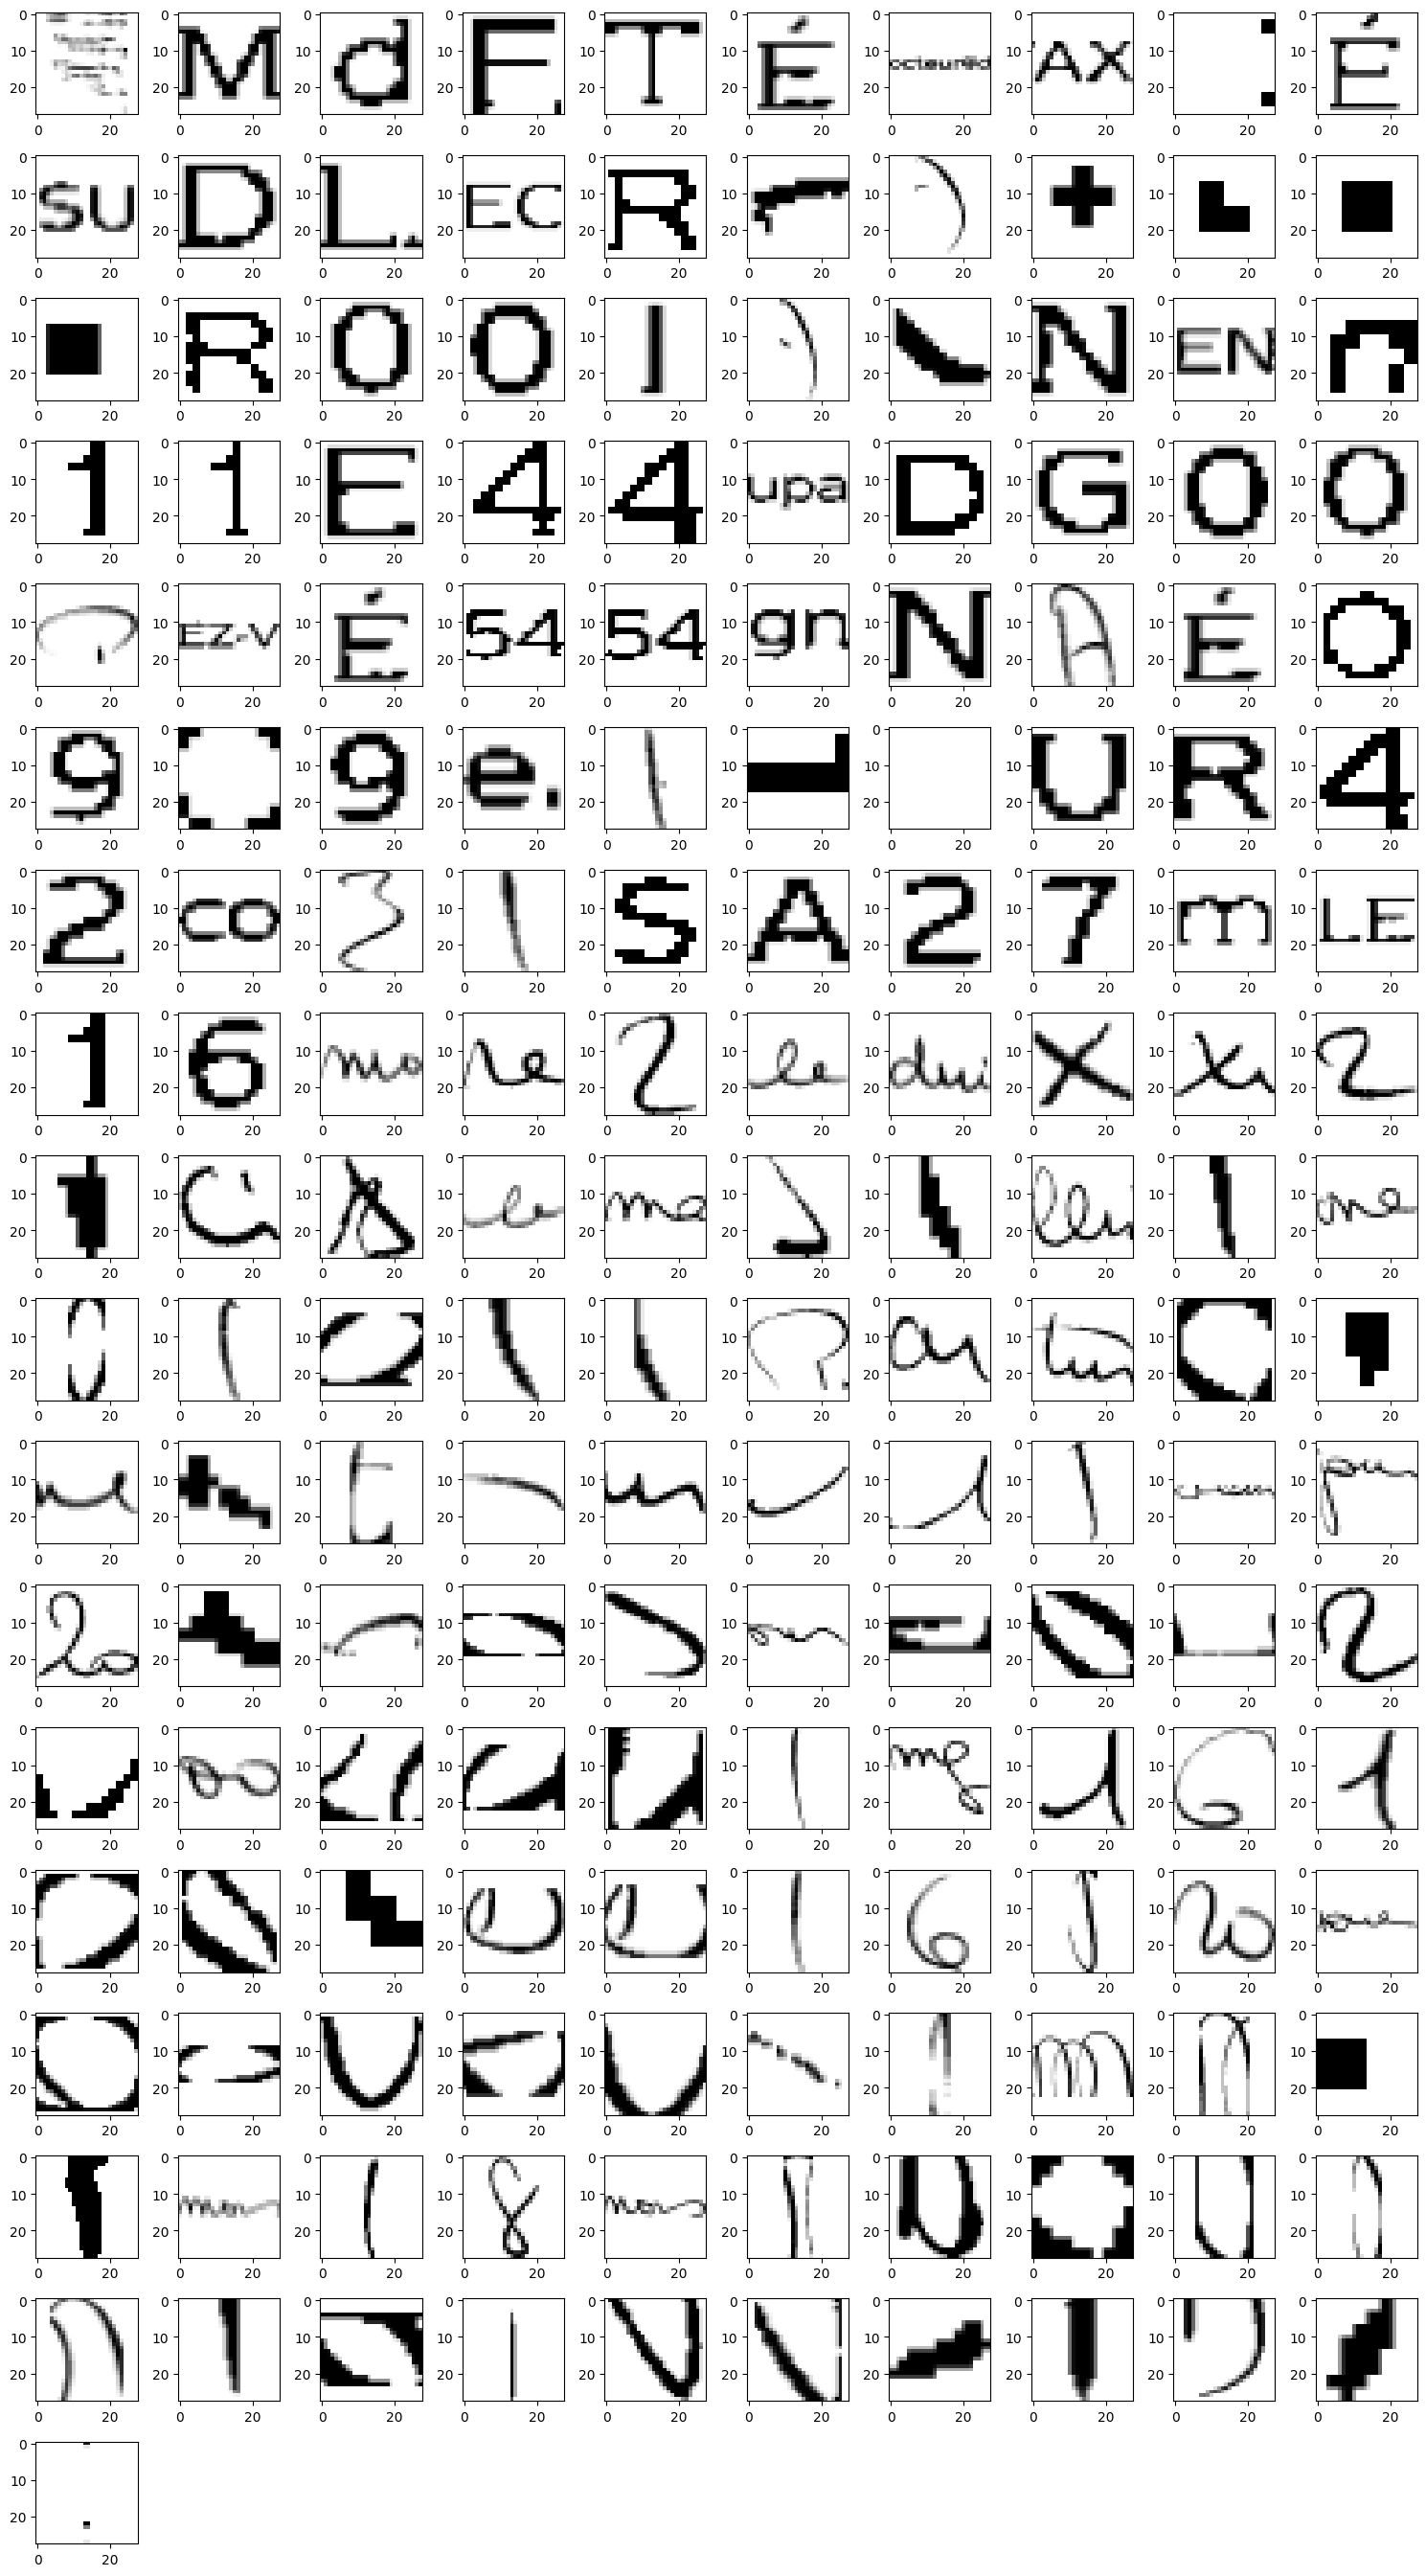

In [ ]:
n_cols = 10
n_rows = int(np.ceil(len(chars) / n_cols))  # Calculate number of rows as integer
fig = plt.figure(figsize=(1.5 * n_cols, 1.5 * n_rows))
for i, char in enumerate(chars):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.imshow(char[0][:, :, 0], cmap=cm.binary, aspect='auto')
    # plt.axis('off')
plt.tight_layout()


In [ ]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)
# define the list of label names
labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"

6/6 [==============================] - 0s 2ms/step


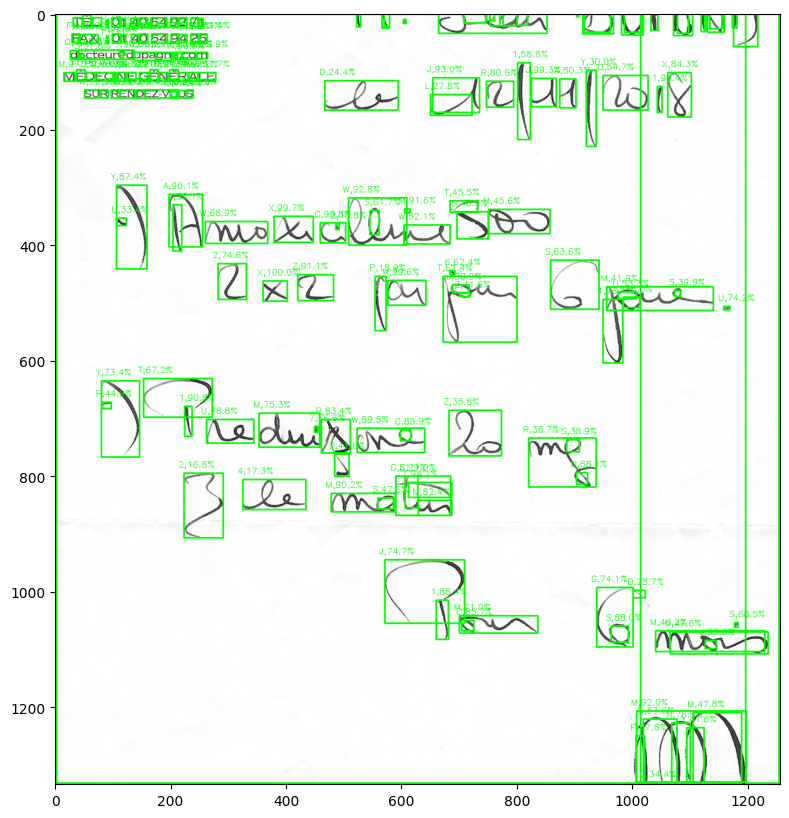